###Day 1 - Monday
Done by Rehahn:
*   Bedroom added

To-do for Hilda:
*   Add last 2 rooms
*   update the other data structures
*   update the functions?

###Day 2 - Tuesday
Done by Hilda:
*   Finished adding all the rooms
*   Updated *all_rooms* & *all_doors* lists
*   Finished defining which items/rooms are related
*   Code logic is working! / no errors thrown, game is working as expected.

To-do for Rehahn:
*Play around with the game, see what type of functions (commands) could be added to improve the experience.

@Hilda - Cool, I don't have much left to do!
I just commented/added a couple of details. To discuss

For ideas to improve the experience:
- automatically explore the room when pass a door (done)
- instead of "examine", directly write "examine object X" (done)
- no need to ask if we want to pass the door after examining the door with a kay ?
- make it more "english": You explore the room. This is the game room. You find: couch, piano, door a
- print "You are now in the room X" only when pass a door
- add a drawing of the room explored (only one room at a time and without the keys!). And some sound/music when find a key or escape!
- add a menu item to print the keys owned
- error handling if time
- put the functions in a python file and import them in jupyter?
- ...


###Day 3 - Wednesday
Done by Hilda:
* Implemented def pass_door to automatically explore the room when going through a door and modified the code to handle this specific input format.
* Added the possibility to examine the name of the object in the same input
* Improve the wording of the game (ongoing) and added some emojis here and there :)


Done by Rehahn:


In [1]:

# imports

from IPython.display import HTML  # , Video

import io
import cv2
import base64
import matplotlib.pyplot as plt

%matplotlib inline



# define rooms and items

# Inside the Game room
couch = {
    "name": "couch",
    "type": "furniture",
}

door_a = {
    "name": "door a",
    "type": "door",
}

key_a = {
    "name": "key for door a",
    "type": "key",
    "target": door_a,
}

piano = {
    "name": "piano",
    "type": "furniture",
}

# Inside Bedroom 1
queen_bed = {
    "name": "queen bed",
    "type": "furniture",
}

door_a = {
    "name": "door a",
    "type": "door",
}

door_b = {
    "name": "door b",
    "type": "door",
}

door_c = {
    "name": "door c",
    "type": "door",
}

key_b = {
    "name": "key for door b",
    "type": "key",
    "target": door_b,
}

# Inside the living room
# defined before Bedroom2 to avoid "error door_d not defined"  # R2
door_d = {
    "name": "door d",
    "type": "door",
}

door_c = {
    "name": "door c",
    "type": "door",
}

dining_table = {
    "name": "dining table",
    "type": "furniture",
}

# Inside Bedroom 2
double_bed = {
    "name": "double bed",
    "type": "furniture",
}

dresser = {
    "name": "dresser",
    "type": "furniture",
}

door_b = {
    "name": "door b",
    "type": "door",
}

key_c = {
    "name": "key for door c",
    "type": "key",
    "target": door_c,
}

key_d = {
    "name": "key for door d",
    "type": "key",
    "target": door_d,
}


# List of the different rooms
game_room = {
    "name": "game room",
    "type": "room",
}

bedroom1 = {
    "name": "bedroom 1",
    "type": "room",
}

bedroom2 = {
    "name": "bedroom 2",
    "type": "room",
}

living_room = {
    "name": "living room",
    "type": "room",
}

outside = {
  "name": "outside"
}

all_rooms = [game_room, bedroom1, bedroom2, living_room, outside]

all_doors = [door_a, door_b, door_c, door_d]


# define which items/rooms are related

object_relations = {
    "door a": [game_room, bedroom1],
    "door b": [bedroom1, bedroom2],
    "door c": [bedroom1, living_room],
    "door d": [living_room, outside],
    "game room": [couch, piano, door_a],
    "bedroom 1": [queen_bed, door_a, door_b, door_c],
    "bedroom 2": [double_bed, dresser, door_b],
    "living room": [door_d, door_c, dining_table],
    "outside": [door_d],
    "piano": [key_a],
    "queen bed": [key_b],
    "double bed": [key_c],
    "dresser": [key_d],
    "couch": [], # R added
    "dining_table": [] # R added
}


# define game state. Do not directly change this dict.
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": game_room,
    "keys_collected": [],
    "target_room": outside
}

In [2]:
# Functions

def linebreak():
    """
    Print a line break
    """
    print("\n")


def start_game():
    """
    Start the game
    """
    print("""Ready to play? Let's go! 🙌🏼
    You wake up on a couch and find yourself in a strange house with
    no windows which you have never been to before. You don't remember
    why you are here and what had happened before. You feel some unknown
    danger is approaching and you must get out of the house, NOW!""")
    linebreak()  # R2
    explore_room(game_state["current_room"])  # R2
    display_drawing(game_state["current_room"])  # R3
    play_room(game_state["current_room"])


def play_room(room):
    """
    Play a room. First check if the room being played is the target room.
    If it is, the game will end with success. Otherwise, let player either
    explore (list all items in this room) or examine an item found here.
    """
    game_state["current_room"] = room
    if (game_state["current_room"] == game_state["target_room"]):
        print(f"\n\nCongrats! You've escaped the room! 🎉 \n")
        display(display_surprise()) # R3
    else:
        # print(f"🔔 You are now in the " + room["name"])  # R2
        print("What would you like to do? Type 'examine', or 'pass door':")  # R3
        intended_action = input(" ")
        # intended_action = input("What would you like to do? Type 'examine', or 'pass door':  ").strip()
            # R2 ("explore" removed), could update lines below
        if intended_action == "explore":
            explore_room(room)  # get/see all the objects in the room (except the keys)
            play_room(room)
        elif intended_action.startswith("examine "):
            examine_item(intended_action[len("examine"):].strip())
        elif intended_action.startswith("pass door "):  # HM- Modification here
            door_name = intended_action[len("pass door "):]  # HM- Modification here
            pass_door(room, door_name)  # HM- Modification here
        else:
            print(f"🚨 Not sure what do you mean. Type 'examine', or 'pass door'.")
            play_room(room)
        # linebreak()


def explore_room(room):
    """
    Explore a room. List all items belonging to this room. #(except the hidden keys)
    """
    linebreak()
    items = [i["name"] for i in object_relations[room["name"]]]
    print(f"👀 You are now exploring the " + room["name"]
          + ". Things you find here are: " + ", ".join(items))


def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the given door.
    Return the room that is not the current_room.
    """
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if (not current_room == room):
            return room


def pass_door(current_room, door_name): #HM- Modification here
    """
    Pass through a door and explore the next room.
    """
    # print(f"🔔 You are now in the " + current_room["name"])  # R2
    next_room = get_next_room_of_door({"name": door_name}, current_room)
    if next_room:
        # plt.imshow(image) # R2 (3lines)  # need to upload the images
        # plt.axis("off")
        # plt.show()
        display_drawing(next_room)
        explore_room(next_room)
        play_room(next_room)
    else:
        print(f"Sorry but there's no {door_name} in this room to pass through. 😢")
        play_room(current_room)

        pass_door(current_room, "door_a")  # ?  # R2
        pass_door(current_room, "door_b")
        pass_door(current_room, "door_c")
        pass_door(current_room, "door_d")


def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if key hasn't been
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains keys.
    Collect the key if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    current_room = game_state["current_room"]
    next_room = ""
    output = None

    # if the object(doors included) exists in the room (and is not a key)
    for item in object_relations[current_room["name"]]:
    # not efficient? replace loop and if by if item_name in
    # object_relations[current_room["name"]]: ?
        if (item["name"] == item_name):
            output = "You examined the " + item_name + ". "
            if (item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:  # remove loop as above?
                    if (key["target"] == item):
                        have_key = True  # we have the key for the door examined
                if (have_key):
                    output += "You unlocked the door! Congrats."
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "It is locked but you don't have the key."
            else:  # a furniture, ...
                if (item["name"] in object_relations
                    and len(object_relations[item["name"]])>0):
                    # >0 means there is a key
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You found the " + item_found["name"] +" ." +"." + "."+ "how exciting! 🤩"+"."
                else:  # an object without a key hidden inside
                    output += "Uhmm...there isn't anything interesting about this object."
            print(output)
            break  # loop

    if (output is None):
        print("The item you requested is not found in the current room.")

    if (next_room
        and input("Do you want to go to the next room? Enter 'yes' or 'no': ").strip() == 'yes'):
        play_room(next_room)  # bool(string) == False if string = "" (True if != "")
    else:
        play_room(current_room)


def display_drawing(room):
    print()
    filename = "/content/" + room["name"].replace(" ", "_") + ".png"
    # from IPython.display import Image
    # display(Image(filename=filename,width=200, height=200))
    # # input("Enter something")
    image = cv2.imread(filename)
    # cv2.resize(image, (30,30))
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(image)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


def display_surprise():
    # from IPython.display import Video
    # Video("/content/victory1.mp4", embed=True, html_attributes="autoplay")
    video = io.open('/content/victory1.mp4', 'r+b').read()
    encoded = base64.b64encode(video)
    return (HTML(data='''<video width="420" height="320" controls autoplay>
                         <source src="data:video/mp4;base64,{0}" type="video/mp4"/>
                         </video>'''.format(encoded.decode('ascii'))))



Ready to play? Let's go! 🙌🏼
    You wake up on a couch and find yourself in a strange house with
    no windows which you have never been to before. You don't remember
    why you are here and what had happened before. You feel some unknown
    danger is approaching and you must get out of the house, NOW!




👀 You are now exploring the game room. Things you find here are: couch, piano, door a



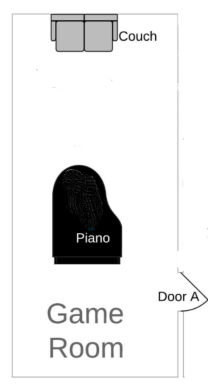

What would you like to do? Type 'examine', or 'pass door':
 examine piano
You examined the piano. You found the key for door a ...how exciting! 🤩.
What would you like to do? Type 'examine', or 'pass door':
 pass door door a



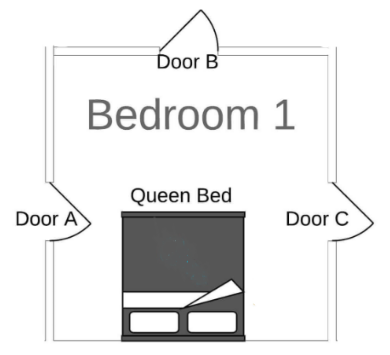



👀 You are now exploring the bedroom 1. Things you find here are: queen bed, door a, door b, door c
What would you like to do? Type 'examine', or 'pass door':
 examine queen bed
You examined the queen bed. You found the key for door b ...how exciting! 🤩.
What would you like to do? Type 'examine', or 'pass door':
 pass door door b



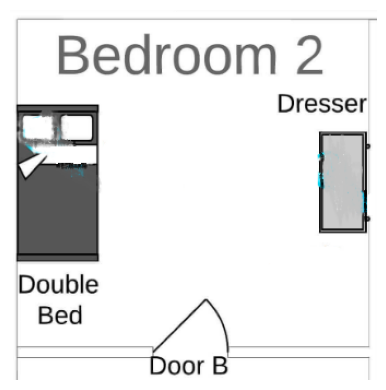



👀 You are now exploring the bedroom 2. Things you find here are: double bed, dresser, door b
What would you like to do? Type 'examine', or 'pass door':
 examine double bed
You examined the double bed. You found the key for door c ...how exciting! 🤩.
What would you like to do? Type 'examine', or 'pass door':
 examine dresser
You examined the dresser. You found the key for door d ...how exciting! 🤩.
What would you like to do? Type 'examine', or 'pass door':
 pass door door b



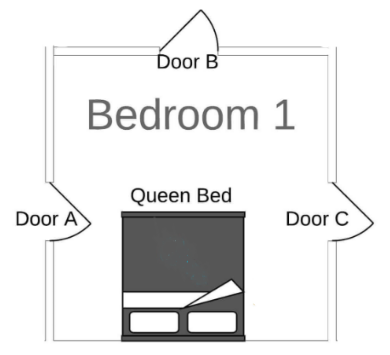



👀 You are now exploring the bedroom 1. Things you find here are: queen bed, door a, door b, door c
What would you like to do? Type 'examine', or 'pass door':
 pass door door c



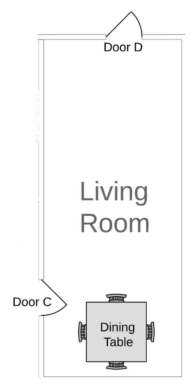



👀 You are now exploring the living room. Things you find here are: door d, door c, dining table
What would you like to do? Type 'examine', or 'pass door':
 pass door door d



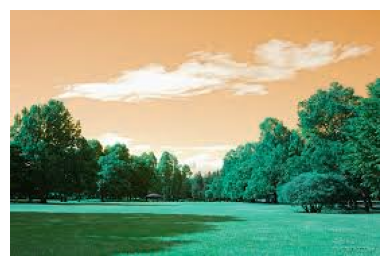



👀 You are now exploring the outside. Things you find here are: door d


Congrats! You've escaped the room! 🎉 



In [3]:

# Main
game_state = INIT_GAME_STATE.copy()
start_game()
